### Классификация FashionMNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [236]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import FashionMNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Вернемся к задаче распознавания простых изображений, рассмотренной ранее. Но теперь будем работать с набором данных [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 88.5\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбукам с предыдущих занятий.

In [237]:
# do not change the code in the block below
# __________start of block__________
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# __________end of block__________

100%|██████████████████████████| 26421880/26421880 [00:19<00:00, 1330654.03it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 597073.75it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:00<00:00, 7869276.22it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 1019995.13it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Text(0.5, 1.0, 'Image label: 4')

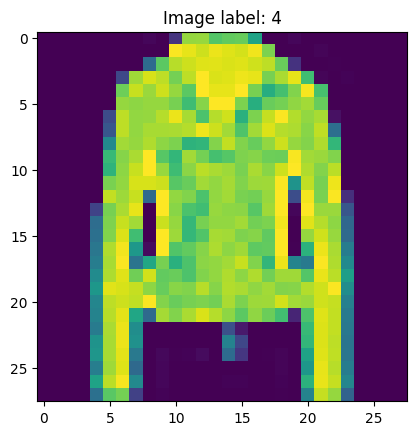

In [238]:
# do not change the code in the block below
# __________start of block__________

train_fmnist_data = FashionMNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_fmnist_data = FashionMNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 88.5% accuracy.

__Внимание, ваша модель должна быть представлена именно переменной `model`. На вход ей должен приходить тензор размерностью (1, 28, 28).__

In [579]:
# Creating model instance
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 686),
    nn.ReLU(),
    nn.Linear(686, 343),
    nn.ReLU(),
    nn.Linear(343, 38),
    nn.ReLU(),
    nn.Linear(38, 10)
)

Не забудьте перенести модель на выбранный `device`!

In [580]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=686, bias=True)
  (2): ReLU()
  (3): Linear(in_features=686, out_features=343, bias=True)
  (4): ReLU()
  (5): Linear(in_features=343, out_features=38, bias=True)
  (6): ReLU()
  (7): Linear(in_features=38, out_features=10, bias=True)
)

Локальные тесты для проверки вашей модели доступны ниже:

In [581]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Также рекомендуем поработать с `learning rate`.

In [582]:
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
for i in range(10):
    for X_train, Y_train in train_data_loader:
        predictions = model(X_train)
        loss = loss_fn(predictions, Y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [583]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [584]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.9225


In [585]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [586]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.8906


Проверка, что необходимые пороги пройдены:

In [587]:
assert test_acc >= 0.885, 'Train accuracy is below 0.885 threshold'
assert train_acc >= 0.905, 'Test accuracy is below 0.905 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw10_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [588]:
!wget https://github.com/girafe-ai/ml-course/raw/23f_ysda/homeworks/assignment13_fashionmnist_classification/hw13_data_dict.npy

zsh:1: command not found: wget


In [597]:
# do not change the code in the block below
# __________start of block__________
import os
import json


assert os.path.exists('hw13_data_dict.npy'), 'Please, download `hw13_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())
    
    predicted_labels = torch.cat(predicted_labels).tolist()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw13_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_hw13.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_hw13.npy`')
# __________end of block__________

File saved to `submission_dict_hw13.npy`


На этом задание завершено. Поздравляем!